# [AA]katsuki Desriptive analytics notebook, task 1 and 2

Wetter daten sind nun bereinigt, jetzt den hauptdatensatz erweitern um Spätere Anwendung zu vereinfachen:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv('chicago_2019.csv',parse_dates=['start_time','end_time'])
df_weather=pd.read_csv('weather_clean_final.csv',parse_dates=['date_time'])
df_weather=df_weather.drop('Unnamed: 0',axis=1)




In [2]:
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber
...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber


In [3]:
df_weather

,date_time,max_temp,min_temp,avg_temp,precip
0,2019-01-01 00:00:00,2.80,2.2,2.500,1.0
1,2019-01-01 01:00:00,2.20,1.1,1.650,1.0
2,2019-01-01 02:00:00,1.65,1.1,1.375,1.0
3,2019-01-01 03:00:00,1.10,1.1,1.100,1.0
4,2019-01-01 04:00:00,1.10,1.1,1.100,1.0
...,...,...,...,...,...
8755,2019-12-31 19:00:00,-3.30,-3.3,-3.300,0.0
8756,2019-12-31 20:00:00,-3.30,-3.3,-3.300,0.0
8757,2019-12-31 21:00:00,-3.30,-3.3,-3.300,0.0
8758,2019-12-31 22:00:00,-3.30,-3.3,-3.300,0.0


### Achtung die nächste Zelle kann von ihnen nicht ausgeführt werden, da ihnen die csv Datei nicht vorliegt
Sie ist zu groß für das Git repository, daher ist eine kleinere Datei hochgeladen worde, die die wichtigen Informationen beinhaltet und die wir auch im repository haben.

---------Zelle hierdrunter ist als markdown, wir haben sie aber ausgeführt-------

#ab hier möchte ich df erweitern, indem ich die koordinaten der stationen hinzufuege und die wetterdaten zur
#startzeit des trips eintrage

#diese datei enthaelt geographische informationen ueber die stationen
df_bikestation=pd.read_csv('Divvy_Trips_2020_Q1.csv')

#sind nur an den einzelnen stationen interresiert, nicht an den trips
df_stationstart=df_bikestation.loc[~df_bikestation['start_station_id'].duplicated(),:]
df_stationsend=df_bikestation.loc[~df_bikestation['end_station_id'].duplicated(),:]

#dropping all unnecessarily rows
df_stationstart.drop(['end_station_id','end_station_name','end_lat','end_lng','ride_id','rideable_type','started_at','ended_at','member_casual'],axis=1, inplace=True)
df_stationsend.drop(['start_station_id','start_station_name','start_lat','start_lng','ride_id','rideable_type','started_at','ended_at','member_casual'],axis=1, inplace=True)

#die ids von stationsend umwandeln in int, denn sie sind irgendwie floats
df_stationsend=df_stationsend.dropna()
df_stationsend['end_station_id']=df_stationsend['end_station_id'].astype('int')
df_stationsend['end_station_id']

#die columns gleich benennen um sie gleich hintereinandr zu packen
df_stationstart.rename({'start_station_name':'station_name','start_station_id':'station_id','start_lat':'lat','start_lng':'lng'}, axis=1, inplace=True)
df_stationsend.rename({'end_station_name':'station_name','end_station_id':'station_id','end_lat':'lat','end_lng':'lng'}, axis=1, inplace=True)


#alle stationen aneinander zu haengen
df_stationsall=df_stationstart.append(df_stationsend,ignore_index=True)


#alle doppelungen nochmal loeschen und sortieren nach station_id
df_stationsmerge=df_stationsall.loc[~df_stationsall['station_id'].duplicated(),:]
df_stationsmerge=df_stationsmerge.sort_values('station_id')
df_stationsmerge

---------Zelle hierdrüber ist  markdown, wir haben sie aber ausgeführt-------

#### Die folgende Zelle können sie aber durchführen und damit funktionert der code auch weider

In [4]:
#hier wird die Datei eimal gesichert, diese koennen wir auf github hochladen, und damit ist der code ausfuerbar!
#df_stationsmerge.to_csv('bikestations_geolocation.csv')

df_stationsmerge=pd.read_csv('bikestations_geolocation.csv')
df_stationsmerge.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
#hier wird jetzt gemerged, einmal werden die wetterdaten pro trip dazugeholt, dafuer hier
#erstmal neue columns erstellen mit der abgerundeten zeiten(stunde/monat/ etc)
#auch fuer spaetere analysen wichtig
df['date']=df['start_time'].apply(lambda d: pd.to_datetime(d).floor('d'))
df['s_hour']=df['start_time'].apply(lambda h: h.hour)
df['s_day']=df['start_time'].apply(lambda d: d.day)
df['weekday']=df['start_time'].apply(lambda w: w.dayofweek)
df['s_month']=df['start_time'].apply(lambda m: m.month)


In [6]:
#auch hier die timestamps abbrunden um gleich zusammenzufuehren
df_weather['hour']=df_weather['date_time'].apply(lambda h :h.hour)
df_weather['day']=df_weather['date_time'].apply(lambda d :d.day)
df_weather['month']=df_weather['date_time'].apply(lambda m :m.month)

df=df.merge(df_weather[['avg_temp','precip','hour','day','month']],how='left',left_on=['s_hour','s_day','s_month'],right_on=['hour','day','month'])
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,s_hour,s_day,weekday,s_month,avg_temp,precip,hour,day,month
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,0,1,1,1,2.5,1.0,0,1,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,0,1,1,1,2.5,1.0,0,1,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,0,1,1,1,2.5,1.0,0,1,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,0,1,1,1,2.5,1.0,0,1,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,0,1,1,1,2.5,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,2019-12-31,23,31,1,12,-2.8,0.0,23,31,12
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,2019-12-31,23,31,1,12,-2.8,0.0,23,31,12
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,2019-12-31,23,31,1,12,-2.8,0.0,23,31,12
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,2019-12-31,23,31,1,12,-2.8,0.0,23,31,12


In [7]:
#geographischen koordinaten der startstationen hinzufuegen
df=pd.merge(df,df_stationsmerge,how='left',left_on=['start_station_id'],right_on=['station_id'])
df.rename({'lat':'start_lat','lng':'start_lng'}, axis=1, inplace=True)
df.drop(['station_id','station_name'],axis=1, inplace=True)


In [8]:
#geographischen koordinaten der endstationen hinzufuegen
df=pd.merge(df,df_stationsmerge,how='left',left_on=['end_station_id'],right_on=['station_id'])
df.rename({'lat':'end_lat','lng':'end_lng'}, axis=1, inplace=True)
df.drop(['station_id','station_name'],axis=1, inplace=True)

In [9]:
#doppelte zeiten brauchen wir nicht
df.drop(['s_hour','s_day','s_month'],axis=1, inplace=True)

In [10]:
df.count()

start_time            3818004
end_time              3818004
start_station_id      3818004
end_station_id        3818004
start_station_name    3818004
end_station_name      3818004
bike_id               3818004
user_type             3818004
date                  3818004
weekday               3818004
avg_temp              3818004
precip                3818004
hour                  3818004
day                   3818004
month                 3818004
start_lat             3817819
start_lng             3817819
end_lat               3817740
end_lng               3817740
dtype: int64

In [11]:
#trip duration
df['trip_duration']=df['end_time']-df['start_time']

In [12]:
#die minuten ausrechnen aus der trip_duration, die in komischen delta_timestamp format sind
df['trip_duration_min']=df['trip_duration'].apply(lambda h :h.seconds)
df['trip_duration_min']=df['trip_duration_min'].apply(lambda x :np.ceil(x/60).astype('int'))

In [13]:
#trip duration weg damit, die minuten reichen.
df=df.drop('trip_duration',axis=1)
df['avg_temp']=df['avg_temp'].astype(float)

In [14]:
df=df.sort_values('start_time')

In [15]:
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,avg_temp,precip,hour,day,month,start_lat,start_lng,end_lat,end_lng,trip_duration_min
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,2.5,1.0,0,1,1,41.8915,-87.6268,41.8916,-87.6484,7
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,2.5,1.0,0,1,1,41.8847,-87.6277,41.8763,-87.6292,8
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,2.5,1.0,0,1,1,41.8582,-87.6565,41.8686,-87.6862,14
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,2.5,1.0,0,1,1,41.9227,-87.6972,41.9030,-87.6313,30
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,2.5,1.0,0,1,1,41.8969,-87.6217,41.8923,-87.6120,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,2019-12-31,1,-2.8,0.0,23,31,12,41.8837,-87.6487,41.9199,-87.6488,20
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,2019-12-31,1,-2.8,0.0,23,31,12,41.8810,-87.6241,41.8810,-87.6241,26
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,2019-12-31,1,-2.8,0.0,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,2019-12-31,1,-2.8,0.0,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9


Für geographical demand, die coordinaten in tuple packen:

In [16]:
#adding coordinates to the main dataset 
df['start_coordinates'] = list(zip(df["start_lat"],df["start_lng"]))

In [17]:
df['end_coordinates'] = list(zip(df["end_lat"],df["end_lng"]))

# Wichtig, bis hierhin den Code ausführen, mit der nächsten Zelle hat man dann den Datensatz, welcher teilweise in anderen notebooks verwendet wird!

In [18]:
#Bis Hierhin alles einmal ausfuehren, dann hat man den Datensatz mit den man arbeiten will
df_safe=df.copy()
df_safe['start_time']=df_safe['start_time'].astype(str)
df_safe['end_time']=df_safe['end_time'].astype(str)
df_safe['date']=df_safe['date'].astype(str)
df_safe.to_csv('processed_dataframe.csv')

In [19]:
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,hour,day,month,start_lat,start_lng,end_lat,end_lng,trip_duration_min,start_coordinates,end_coordinates
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,0,1,1,41.8915,-87.6268,41.8916,-87.6484,7,"(41.8915, -87.6268)","(41.8916, -87.6484)"
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,...,0,1,1,41.8847,-87.6277,41.8763,-87.6292,8,"(41.8847, -87.6277)","(41.8763, -87.6292)"
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,...,0,1,1,41.8582,-87.6565,41.8686,-87.6862,14,"(41.8582, -87.6565)","(41.8686, -87.6862)"
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,0,1,1,41.9227,-87.6972,41.9030,-87.6313,30,"(41.9227, -87.6972)","(41.903, -87.6313)"
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,0,1,1,41.8969,-87.6217,41.8923,-87.6120,7,"(41.8969, -87.6217)","(41.8923, -87.612)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,2019-12-31,1,...,23,31,12,41.8837,-87.6487,41.9199,-87.6488,20,"(41.8837, -87.6487)","(41.9199, -87.6488)"
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,2019-12-31,1,...,23,31,12,41.8810,-87.6241,41.8810,-87.6241,26,"(41.881, -87.6241)","(41.881, -87.6241)"
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"


# Task 2 Descriptive analytics
##### Ab hier werden Daten analysiert und in Tabellen oder Graphiken dargestellt!

[Text(0.5, 0, 'Sunshine or rain/snow'), Text(0, 0.5, 'trips')]

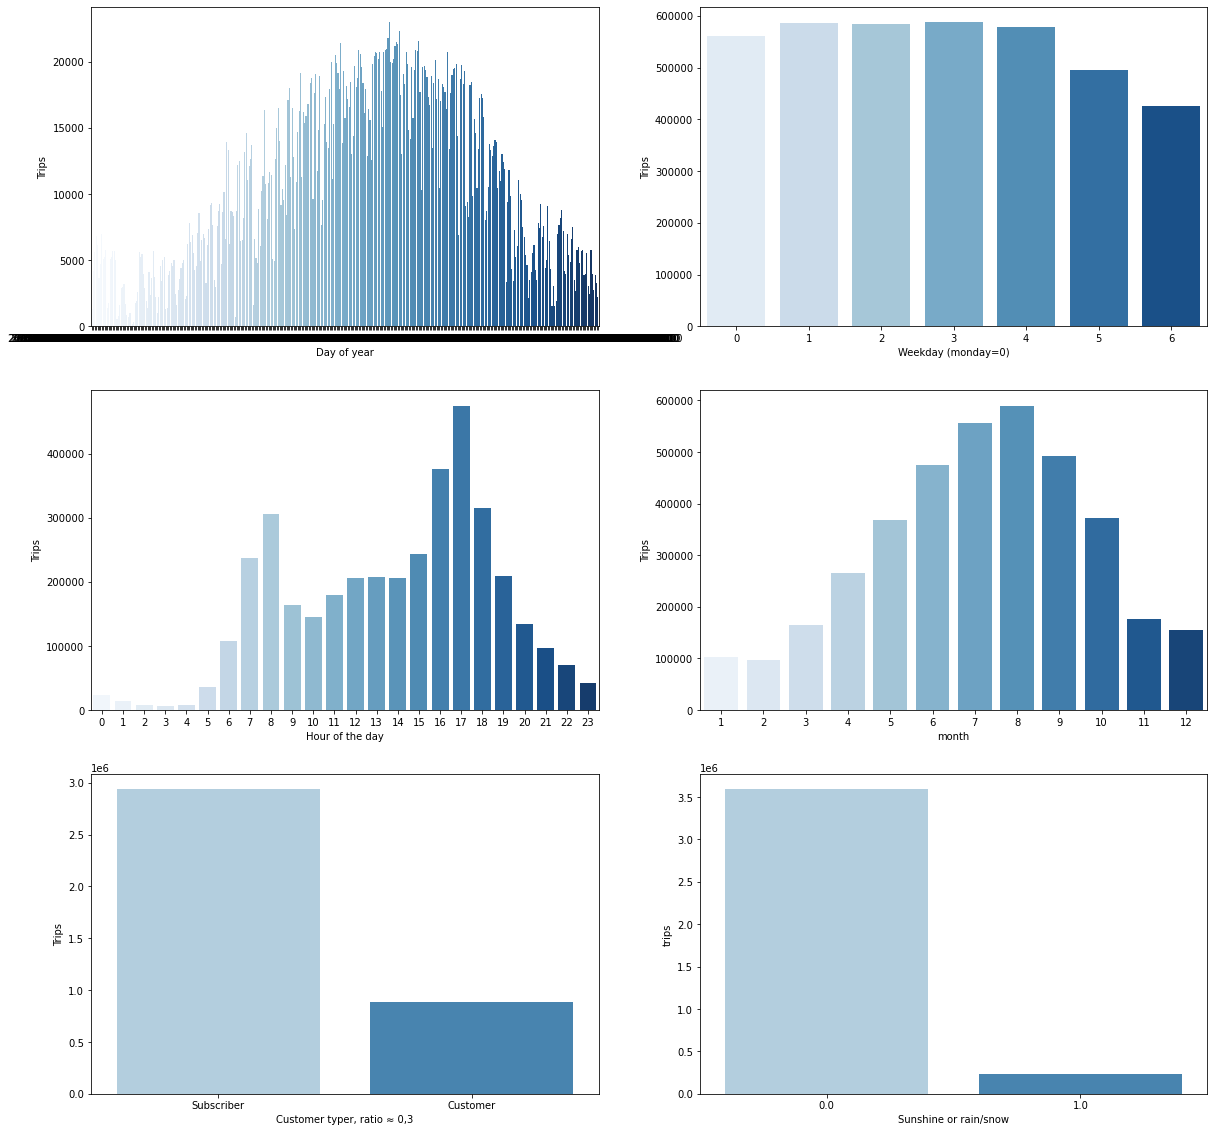

In [20]:
#hierbei geht es immer um start zeit!
import seaborn as sns

f, axes=plt.subplots(3,2, figsize=(20,20))

day_plot=sns.countplot(x='date',data=df,ax=axes[0][0],palette='Blues')
day_plot.set(xlabel='Day of year', ylabel='Trips')

weekday_plot=sns.countplot(x='weekday',data=df,ax=axes[0][1],palette='Blues')
weekday_plot.set(xlabel='Weekday (monday=0)', ylabel='Trips')

time_plot=sns.countplot(x='hour',data=df,ax=axes[1][0],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Trips')

month_plot=sns.countplot(x='month',data=df,ax=axes[1][1],palette='Blues')
month_plot.set(xlabel='month', ylabel='Trips')
                                                   
customer_plot=sns.countplot(x='user_type',data=df,ax=axes[2][0],palette='Blues')
#ratio=str(df['user_type'].value_counts()[1]/df['user_type'].value_counts()[0])
customer_plot.set(xlabel='Customer typer, ratio ≈ 0,3', ylabel='Trips')

rain_plot=sns.countplot(x='precip',data=df,ax=axes[2][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='trips')

[Text(0.5, 0, 'Day of year'), Text(0, 0.5, 'Trips')]

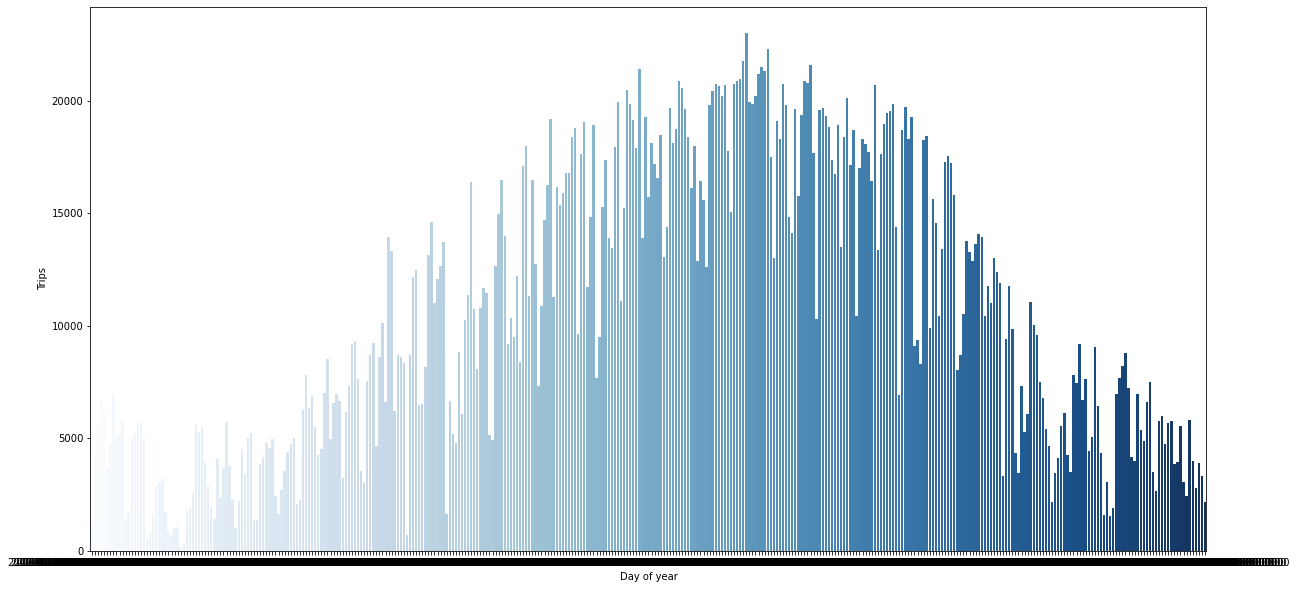

In [21]:
#einzelner Plot, zum abspeichern
f, axes=plt.subplots(1,1, figsize=(20,10))

day_plot=sns.countplot(x='date',data=df,palette='Blues')
day_plot.set(xlabel='Day of year', ylabel='Trips')
#plt.savefig('Ausleihen an jedem tag im Jahr.png', dpi = 600)

In [22]:
#trips bei keinem Regen/schnee und bei keinem niederschlag
df['precip'].value_counts()

0.0    3590168
1.0     227836
Name: precip, dtype: int64

In [23]:
#verhaeltnis von trips im regen zu kein regen
df['precip'].value_counts()[1]/df['precip'].value_counts()[0]

0.06346109708515034

In [24]:
#stunden mit niedersdchlag und stunden ohne niederschlag:
df_weather['precip'].value_counts()

0.0    7829
1.0     931
Name: precip, dtype: int64

In [25]:
#verhaeltnis von stunden mit regen zu stunden ohne regen, also 11% der stunden war regen.
df_weather['precip'].value_counts()[1]/df_weather['precip'].value_counts()[0]

0.11891684761783114

some importand KPI's:

In [26]:
df

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,...,hour,day,month,start_lat,start_lng,end_lat,end_lng,trip_duration_min,start_coordinates,end_coordinates
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,2019-01-01,1,...,0,1,1,41.8915,-87.6268,41.8916,-87.6484,7,"(41.8915, -87.6268)","(41.8916, -87.6484)"
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,2019-01-01,1,...,0,1,1,41.8847,-87.6277,41.8763,-87.6292,8,"(41.8847, -87.6277)","(41.8763, -87.6292)"
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,2019-01-01,1,...,0,1,1,41.8582,-87.6565,41.8686,-87.6862,14,"(41.8582, -87.6565)","(41.8686, -87.6862)"
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,2019-01-01,1,...,0,1,1,41.9227,-87.6972,41.9030,-87.6313,30,"(41.9227, -87.6972)","(41.903, -87.6313)"
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,2019-01-01,1,...,0,1,1,41.8969,-87.6217,41.8923,-87.6120,7,"(41.8969, -87.6217)","(41.8923, -87.612)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,2019-12-31 23:56:13,2020-01-01 00:15:45,112,225,Green St & Randolph St,Halsted St & Dickens Ave,2196,Subscriber,2019-12-31,1,...,23,31,12,41.8837,-87.6487,41.9199,-87.6488,20,"(41.8837, -87.6487)","(41.9199, -87.6488)"
3818000,2019-12-31 23:56:34,2020-01-01 00:22:08,90,90,Millennium Park,Millennium Park,4877,Subscriber,2019-12-31,1,...,23,31,12,41.8810,-87.6241,41.8810,-87.6241,26,"(41.881, -87.6241)","(41.881, -87.6241)"
3818001,2019-12-31 23:57:05,2020-01-01 00:05:46,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,863,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"
3818002,2019-12-31 23:57:11,2020-01-01 00:05:45,623,52,Michigan Ave & 8th St,Michigan Ave & Lake St,2637,Subscriber,2019-12-31,1,...,23,31,12,41.8728,-87.6240,41.8860,-87.6241,9,"(41.8728, -87.624)","(41.886, -87.6241)"


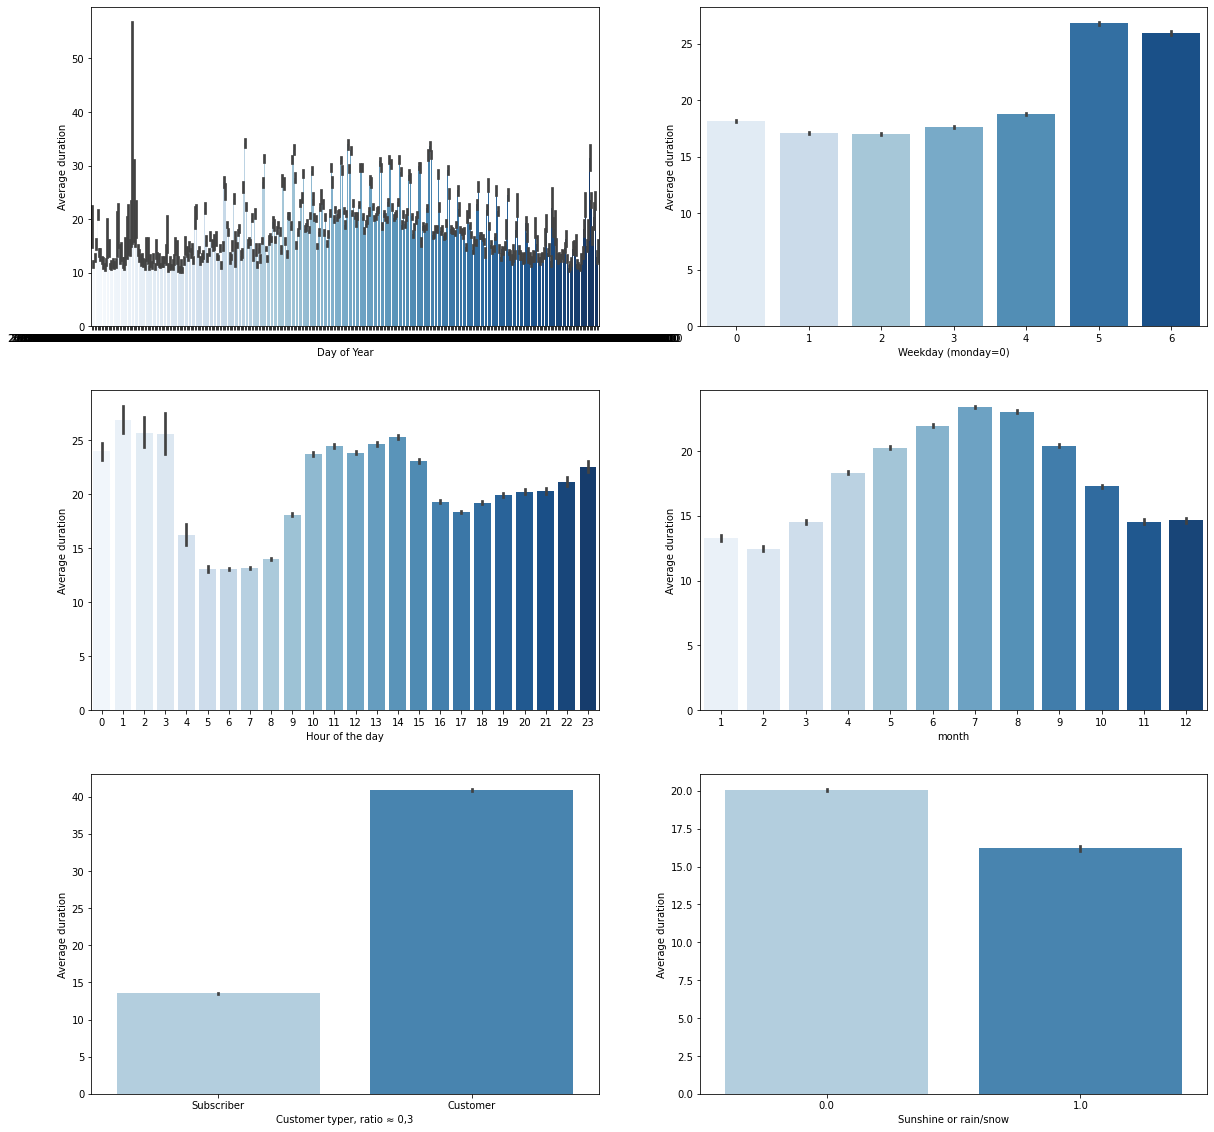

In [59]:
f, axes=plt.subplots(3,2, figsize=(20,20))

#das dauert sehr lange.
#color palettes: 'crest', 'Blues', 'YlOrBr'

days_plot=sns.barplot(x='date',y='trip_duration_min',data=df,ax=axes[0][0],palette='Blues')
days_plot.set(xlabel='Day of Year', ylabel='Average duration')

weekday_plot=sns.barplot(x='weekday',y='trip_duration_min',data=df,ax=axes[0][1],palette='Blues')
weekday_plot.set(xlabel='Weekday (monday=0)', ylabel='Average duration')

time_plot=sns.barplot(x='hour',y='trip_duration_min',data=df,ax=axes[1][0],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Average duration')

month_plot=sns.barplot(x='month',y='trip_duration_min',data=df,ax=axes[1][1],palette='Blues')
month_plot.set(xlabel='month', ylabel='Average duration')

customer_plot=sns.barplot(x='user_type',y='trip_duration_min',data=df,ax=axes[2][0],palette='Blues')
#ratio=str(df['user_type'].value_counts()[1]/df['user_type'].value_counts()[0])
customer_plot.set(xlabel='Customer typer, ratio ≈ 0,3', ylabel='Average duration')

rain_plot=sns.barplot(x='precip',y='trip_duration_min',data=df,ax=axes[2][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='Average duration')

plt.show()

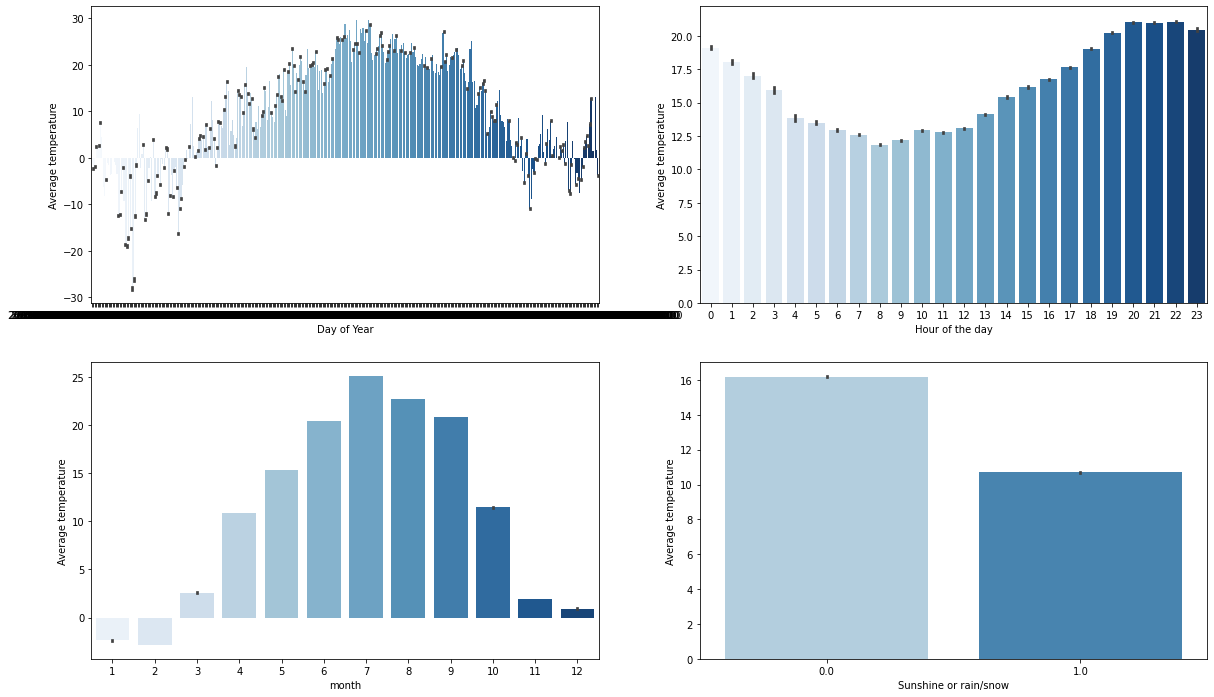

In [60]:
f, axes=plt.subplots(2,2, figsize=(20,12))

#color palettes: 'crest', 'Blues', 'YlOrBr'

days_plot=sns.barplot(x='date',y='avg_temp',data=df,ax=axes[0][0],palette='Blues')
days_plot.set(xlabel='Day of Year', ylabel='Average temperature')

time_plot=sns.barplot(x='hour',y='avg_temp',data=df,ax=axes[0][1],palette='Blues')
time_plot.set(xlabel='Hour of the day', ylabel='Average temperature')

month_plot=sns.barplot(x='month',y='avg_temp',data=df,ax=axes[1][0],palette='Blues')
month_plot.set(xlabel='month', ylabel='Average temperature')

rain_plot=sns.barplot(x='precip',y='avg_temp',data=df,ax=axes[1][1],palette='Blues')
rain_plot.set(xlabel='Sunshine or rain/snow', ylabel='Average temperature')

plt.show()

### Verschiedene KPI's: in Tabellen form
#### Tabelle 1: stündliche zahlen auf Basis des ganzen jahres(alle daten): <br />
•avg ausleihen zu dieser Stunde <br />
•avf trip duration zu dieser stunde <br />
•Gesammt anzahl an trips zu dieser Stunde(count) <br />
•pro tag avg trips zu dieser stunde <br />
•wie viele ausleihen an diesem Tag bis zu jetzigen stunde(einmal avg und einmal aufs jahr bezogen, wobei aufs jahr bezogen die daten glaube ich nicht wichtig sind) <br />
•und noch kürzeste und länste ausliehe in dieser Stunde(aber kann an jeden tag des jarhes gewesen sein, also auch glaube ich unwichtige information)

In [61]:
#hole die Informationen ueber groupby aus dem Dataframe und erzeuge neus Dataframe
df_kpi_hourly=df.groupby('hour').trip_duration_min.agg(['min','max','mean','count'])
df_kpi_hourly.rename({'mean':'mean_trip_duration','max':'max_duration'}, axis=1, inplace=True)

In [62]:
#verschönere die Zahlen und füge noch eine neue spalte hinzu:
df_kpi_hourly['count_avg_per_day']=df_kpi_hourly['count'].apply(lambda x:round(x/365,2))
df_kpi_hourly['mean_trip_duration']=df_kpi_hourly['mean_trip_duration'].apply(lambda s:round(s,2))

In [63]:
#fuege die Summen hinzu, also cumulative?
df_kpi_hourly['counts_sum']=df_kpi_hourly['count'].cumsum()
df_kpi_hourly['counts_sum_avg']=df_kpi_hourly['count_avg_per_day'].cumsum()


In [64]:
df_kpi_hourly['demand_percentage']=df_kpi_hourly['count'].apply(lambda x: x/len(df))
df_kpi_hourly['demand_percentage_sum']=df_kpi_hourly['demand_percentage'].cumsum()

In [65]:
print('Das ist die Fertige Tabelle 1:')
df_kpi_hourly

Das ist die Fertige Tabelle 1:


,min,max_duration,mean_trip_duration,count,count_avg_per_day,counts_sum,counts_sum_avg,demand_percentage,demand_percentage_sum
hour,,,,,,,,,
0,2,1374,23.95,24078,65.97,24078,65.97,0.006306,0.006306
1,2,1425,26.83,14417,39.50,38495,105.47,0.003776,0.010082
2,2,1351,25.67,8664,23.74,47159,129.21,0.002269,0.012352
3,2,1362,25.59,5611,15.37,52770,144.58,0.001470,0.013821
4,2,1344,16.23,7789,21.34,60559,165.92,0.002040,0.015861
5,2,1111,13.06,35770,98.00,96329,263.92,0.009369,0.025230
6,2,1410,13.08,108232,296.53,204561,560.45,0.028348,0.053578
7,2,1410,13.16,237708,651.25,442269,1211.70,0.062260,0.115838
8,2,1435,14.00,305780,837.75,748049,2049.45,0.080089,0.195927


- hour= die Stunde um die es geht! 0 Uhr =24 Uhr!
- min= minimale trip duration zu dieser Uhrzeit, bezogen aufs ganze Jahr
- max_duration= maximale trip duration(ausleihzeit)  in dieser Uhrzeit, bezogen aufs ganze Jahr
- count= ausleihen um diese Uhrzeit, bezogen aufs ganze Jahr
- count_avg_per_day= count/365, also durchschnittliche ausleihen an einem Tag zu dieser Uhrzeit, bezogen aufs ganze Jahr
- counts_sum= comulativ von count(aufsummiert counts bis zu der Zeile)
- counts_sum_avg= comulativ von count_avg_per_day
- demand_percentage= counts/ summe aller trips. also Prozentzahl der Trips zu dierser Uhrzeit zu den gesammt Trips von 2019
- demand_percentage_sum= comulativ von demand_percentage

#### Tabelle 2: Daten bezüglich jeden Tages des jahres:  <br />
•Durchschnittliche ausleihdauer an diesem Tag <br />
•gesammt ausleihen an diesem Tag <br />
•Ausleihen gesammt in diesem Jahr bis zu diesem Tag! <br />
•auch hier wieder maximale und minimale ausleihdauer, hier ein bisschen mehr aussagekräftig aber auch nicht wirklich 

In [66]:
#gibt dir anzahl der tage des monats
def tagepromonth(month):
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        return 31
    if month==4 or month==6 or month==9 or month==11:
        return 30
    if month==2:
        return 28
    
datesnotime=[]

#erstellt eine liste mit allen daten des jahre( 365 tage)
for monat in range(12):
    for tag in range(tagepromonth(monat+1)):
        
        if monat<9:
            mon='0'+str(monat+1)
        else:
            mon=str(monat+1)
        if tag<9:
            day='0'+str(tag+1)
        else:
            day=str(tag+1)
                
        date="2019-"+mon+"-"+day
        datesnotime.append(date)

In [67]:
#holt die daten mit groupby aus dem Hauptdatensatz
df_kpi_daily=df.groupby('date').trip_duration_min.agg(['min','max','mean','count'])
df_kpi_daily.rename({'mean':'mean_trip_duration','max':'max_duration'}, axis=1, inplace=True)
df_kpi_daily.reset_index(drop=True, inplace=True)
df_kpi_daily['date']=datesnotime


In [68]:
#rearrange colums:(um datum als erste spalte zu haben)
cols = df_kpi_daily.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_kpi_daily = df_kpi_daily[cols] 


In [69]:
#summmiert wieder auf 
df_kpi_daily['counts_sum']=df_kpi_daily['count'].cumsum()

In [70]:
df_kpi_daily['demand_percentage']=df_kpi_daily['count'].apply(lambda x: x/len(df))
df_kpi_daily['demand_percentage_sum']=df_kpi_daily['demand_percentage'].cumsum()

In [71]:
print('Das ist die Fertige Tabelle 2:')
df_kpi_daily

Das ist die Fertige Tabelle 2:


,date,min,max_duration,mean_trip_duration,count,counts_sum,demand_percentage,demand_percentage_sum
0,2019-01-01,2,1426,18.257622,1312,1312,0.000344,0.000344
1,2019-01-02,2,889,11.602158,4170,5482,0.001092,0.001436
2,2019-01-03,2,1190,12.765041,5618,11100,0.001471,0.002907
3,2019-01-04,2,1413,15.423524,6793,17893,0.001779,0.004686
4,2019-01-05,2,1395,20.738793,6179,24072,0.001618,0.006305
...,...,...,...,...,...,...,...,...
360,2019-12-27,2,1307,16.756091,3981,3805837,0.001043,0.996813
361,2019-12-28,2,1436,20.384393,2768,3808605,0.000725,0.997538
362,2019-12-29,2,1351,23.436443,3902,3812507,0.001022,0.998560
363,2019-12-30,2,1075,12.854897,3308,3815815,0.000866,0.999427


- date = der Tag um den es geht
- min = minimale trip duration an diesem Tag
- max_duration= maximale trip duration(ausleihzeit) an diesem Tag
- count= ausleihen an diesem Tag
- counts_sum= comulativ von count (aufsummiert counts bis zu der Zeile)
- demand_percentage= counts/ summe aller trips. also prozentzahl der trips an diesem Tag zu den gesammten Trips von 2019
- demand_percentage_sum= comulativ von demand_percentage

#### Tabelle 3: Informationen zu den ausleihen bezogen auf die 12 Monate: <br />
•avg ausleihdauer in diesem Monat <br />
•Ausleihen gesammt in diesem Monat <br />
•Ausleihen dieses Jahr bis einschließlich diesen Monat <br />
•Mininamle und maximale Ausleihdauer in diesem Monat, auch wieder nicht wirklich aussage kräftig <br />


In [72]:
#holt die informationen aus dem haupt Dataframe
df_kpi_monthly=df.groupby('month').trip_duration_min.agg(['min','max','mean','count'])
df_kpi_monthly.rename({'mean':'mean_trip_duration','max':'max_duration'}, axis=1, inplace=True)


In [73]:
#summmiert wieder auf
df_kpi_monthly['counts_sum']=df_kpi_monthly['count'].cumsum()

In [74]:
#trennt index und monat voneinander, finde das passt besser!
df_kpi_monthly.reset_index(drop=True, inplace=True)
df_kpi_monthly['month']=range(1,13,1)
#rearrange colums:
cols = df_kpi_monthly.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_kpi_monthly = df_kpi_monthly[cols] 


In [75]:
df_kpi_monthly['demand_percentage']=df_kpi_monthly['count'].apply(lambda x: x/len(df))
df_kpi_monthly['demand_percentage_sum']=df_kpi_monthly['demand_percentage'].cumsum()

In [76]:
print('Das ist die Fertige Tabelle 3:')
df_kpi_monthly

Das ist die Fertige Tabelle 3:


,month,min,max_duration,mean_trip_duration,count,counts_sum,demand_percentage,demand_percentage_sum
0,1,1,1434,13.287939,103272,103272,0.027049,0.027049
1,2,2,1438,12.431747,96186,199458,0.025193,0.052241
2,3,2,1410,14.490124,165611,365069,0.043376,0.095618
3,4,1,1438,18.318982,265310,630379,0.069489,0.165107
4,5,2,1440,20.247751,367458,997837,0.096243,0.261350
5,6,2,1439,21.957989,475395,1473232,0.124514,0.385864
6,7,2,1431,23.406617,557315,2030547,0.145970,0.531835
7,8,2,1440,23.045125,590184,2620731,0.154579,0.686414
8,9,1,1437,20.424355,493219,3113950,0.129182,0.815596
9,10,2,1440,17.272980,371786,3485736,0.097377,0.912973


- month = der Monat um den es geht
- min = minimale trip duration in diesem Monat
- max_duration= maximale trip duration(ausleihzeit) an diesem Tag
- count= gesammt ausleihen in diesem Monat
- counts_sum= comulativ von count (aufsummiert counts bis zu der Zeile)
- demand_percentage= counts/ summe aller trips. also prozentzahl der trips in diesem Monat zu den gesammten Trips von 2019
- demand_percentage_sum= comulativ von demand_percentage

In [77]:
#ausleihzeit auf die stunde abrunden, um sie spaeter zu groupen
df['dthour']=df['start_time'].apply(lambda x:x.floor('h'))

In [78]:
#aufteilen in subscriber
df_sub=df[df['user_type']=='Subscriber']

In [79]:
#holt die informationen aus dem haupt Dataframe
#hier werden nur die Daten der subsriber verarbeitet
df_sub=df_sub.groupby('dthour').trip_duration_min.agg(['max','mean','count','sum'])
df_sub.rename({'mean':'mean_trip_duration_sub','count':'total_trips_sub','max':'max_duration_sub','sum':'total_rental_duration_sub'}, axis=1, inplace=True)

In [80]:
#aufteilen in Customer
df_cus=df[df['user_type']=='Customer']

In [81]:
#holt die informationen aus dem haupt Dataframe
#hier werden nur die Daten der Customer verarbeitet
df_cus=df_cus.groupby('dthour').trip_duration_min.agg(['max','mean','count','sum'])
df_cus.rename({'mean':'mean_trip_duration_cus','count':'total_trips_cus','max':'max_duration_cus','sum':'total_rental_duration_cus'}, axis=1, inplace=True)

In [82]:
#hier werden jetzt die beiden tabellen zusammengefuehrt, um aktuellen ausleihen zu betrachten
df_hour=pd.merge(df_sub,df_cus,how='outer',on='dthour')
#da hier alle daten behalten werden, kommen einige NAN dazu, diese mit nullen ausfuehllen
df_hour=df_hour.fillna(0)

In [83]:
#diese informationen sind glaube ich nicht relevant
df_hour.drop(['max_duration_sub','max_duration_cus'],axis=1, inplace=True)

In [84]:
#ausrechen der active rentals um genau der vollen Stunde:
df['end_hour']=df['end_time'].apply(lambda h: h.hour)
df['end_dt']=df['end_time'].apply(lambda x:x.floor('h'))

df_cur=df[df['hour']+1==df['end_hour']].groupby('end_dt').trip_duration_min.count()

In [85]:
df_hour=df_hour.join(df_cur,how='outer')
df_hour=df_hour.fillna(0)
df_hour.rename({'trip_duration_min':'active_rentals_at_this_time'}, axis=1, inplace=True)

In [86]:
#die int sind durch die NAN zu floats geworden, mache das hier jetzt rueckgaengig
df_hour['total_rental_duration_sub']=df_hour['total_rental_duration_sub'].astype('int')
df_hour['total_rental_duration_cus']=df_hour['total_rental_duration_cus'].astype('int')
df_hour['total_trips_sub']=df_hour['total_trips_sub'].astype('int')
df_hour['total_trips_cus']=df_hour['total_trips_cus'].astype('int')
df_hour['trips_total']=df_hour['total_trips_sub']+df_hour['total_trips_cus']
df_hour['active_rentals_at_this_time']=df_hour['active_rentals_at_this_time'].astype('int')


In [87]:
#Tabellen columns sortieren in schoenere reihenfolge
cols=['total_rental_duration_sub','total_rental_duration_cus','trips_total','total_trips_sub','total_trips_cus','active_rentals_at_this_time','mean_trip_duration_sub','mean_trip_duration_cus']
df_hour=df_hour[cols]
df_hour=df_hour.sort_index()

In [88]:
print('Das ist die Fertige Tabelle 4:')
df_hour

Das ist die Fertige Tabelle 4:


,total_rental_duration_sub,total_rental_duration_cus,trips_total,total_trips_sub,total_trips_cus,active_rentals_at_this_time,mean_trip_duration_sub,mean_trip_duration_cus
2019-01-01 00:00:00,409,111,41,37,4,0,11.054054,27.750000
2019-01-01 01:00:00,426,239,48,37,11,7,11.513514,21.727273
2019-01-01 02:00:00,423,475,37,34,3,8,12.441176,158.333333
2019-01-01 03:00:00,172,77,17,12,5,5,14.333333,15.400000
2019-01-01 04:00:00,38,176,10,8,2,5,4.750000,88.000000
...,...,...,...,...,...,...,...,...
2019-12-31 21:00:00,367,163,36,26,10,11,14.115385,16.300000
2019-12-31 22:00:00,328,42,22,20,2,11,16.400000,21.000000
2019-12-31 23:00:00,707,1777,64,46,18,8,15.369565,98.722222
2020-01-01 16:00:00,0,0,0,0,0,1,0.000000,0.000000


- dthour = Der Index, zeigt im Stunden takt Informationen an, Stunde+Datum!
- total_rental_duration_sub = gesammt ausleihzeit der Subsrciber in dieser Stunde
- total_rental_duration_cus = gesammt ausleihzeit der Customer in dieser Stunde
- trips_total = Gesammt anzahl der Ausleihen in dieser Stunde
- total_trips_sub= Gesammt anzahl der Ausleihen in dieser Stunde von Subsrciber
- total_trips_cus= Gesammt anzahl der Ausleihen in dieser Stunde Customer
- active_rentals_at_this_time = Aktive ausleihen zur vollen Sunde, also genau um dieser Uhrzeit
- mean_trip_duration_sub= Durchschnittliche Ausleihzeit der Subsriber in dieser Stunde
- mean_trip_duration_cus= Durchschnittliche Ausleihzeit der Customer in dieser Stunde

In [89]:
#zu tabelle 4 paar plots:

In [91]:
df_hour['ratio']=df_hour['total_trips_sub']/df_hour['total_trips_cus']


[Text(0.5, 0, 'Hourly Date'), Text(0, 0.5, 'Ratio Trips Sub/Cus')]

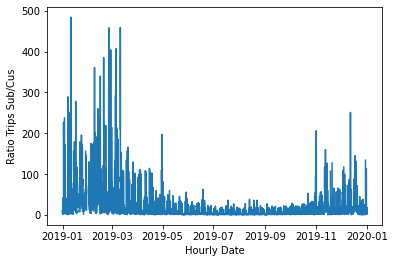

In [107]:
#Verhältnis von customer trips und subsriber trips
ratio=sns.lineplot(data=df_hour['ratio'])
ratio.set(xlabel='Hourly Date', ylabel='Ratio Trips Sub/Cus')

<AxesSubplot:>

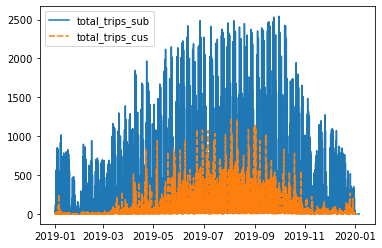

In [108]:
sns.lineplot(data=df_hour[["total_trips_sub",'total_trips_cus']])

<AxesSubplot:>

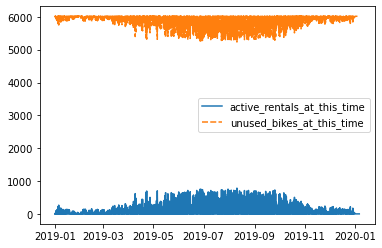

In [109]:
df_hour['unused_bikes_at_this_time']=6017-df_hour['active_rentals_at_this_time']
sns.lineplot(data=df_hour[["active_rentals_at_this_time",'unused_bikes_at_this_time']])

In [110]:

#INformationen über fahrräder
bikes=df.groupby('bike_id').trip_duration_min.agg(['max','mean','count','sum'])
bikes

,max,mean,count,sum
bike_id,,,,
1,924,22.263056,517,11510
2,1047,27.430595,353,9683
3,783,20.348074,701,14264
4,542,19.413043,828,16074
5,156,20.044910,334,6695
...,...,...,...,...
6929,80,13.036036,111,1447
6931,285,17.835165,91,1623
6941,30,11.812500,16,189


In [111]:
df_bikes=pd.DataFrame(columns=['bike_id','trips_total_with_this_bike'])
df_bikes['bike_id']=bikes.index


In [112]:
bikes.reset_index(drop=True, inplace=True)


In [113]:
df_bikes['trips_total_with_this_bike']=bikes['count']
df_bikes['sum_of_all_tripsduration_min']=bikes['sum']
df_bikes

,bike_id,trips_total_with_this_bike,sum_of_all_tripsduration_min
0,1,517,11510
1,2,353,9683
2,3,701,14264
3,4,828,16074
4,5,334,6695
...,...,...,...
6012,6929,111,1447
6013,6931,91,1623
6014,6941,16,189
6015,6942,99,1790


### Es gibt also 6017 Verschieden Fahrräder

[Text(0.5, 0, 'Bike ID'),
 Text(0, 0.5, 'Trips mit diesem Fahrrad im ganzen Jahr')]

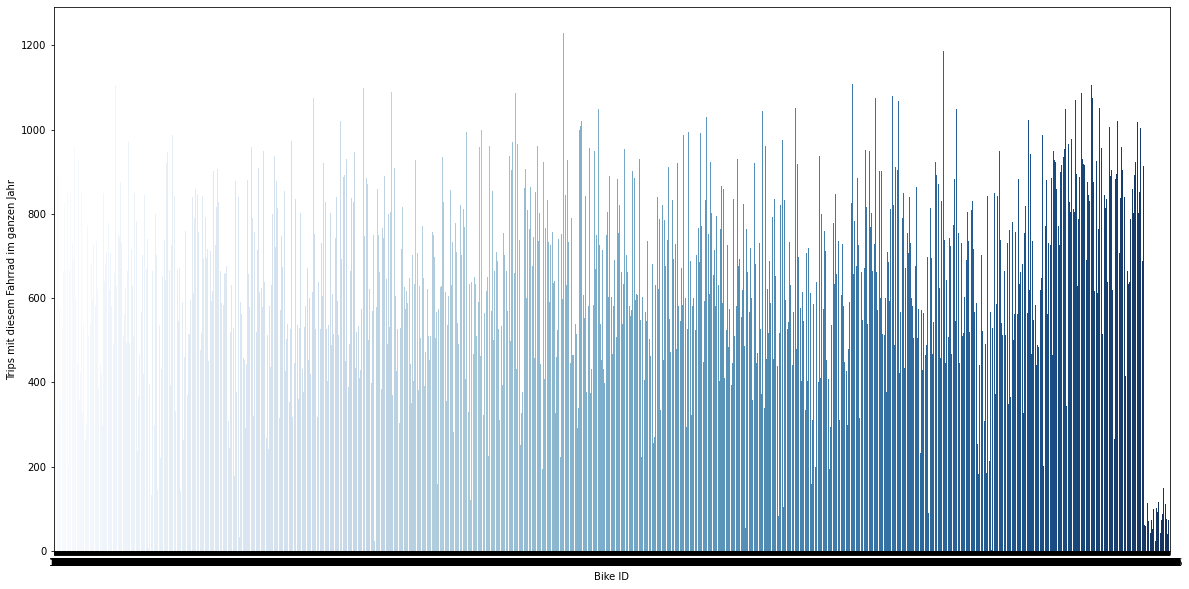

In [114]:

f, axes=plt.subplots(1,1, figsize=(20,10))

bikes_plot=sns.barplot(x='bike_id',y='trips_total_with_this_bike',data=df_bikes,palette='Blues')
bikes_plot.set(xlabel='Bike ID', ylabel='Trips mit diesem Fahrrad im ganzen Jahr')


Text(0, 0.5, 'Different Bikes with that amount of trips')

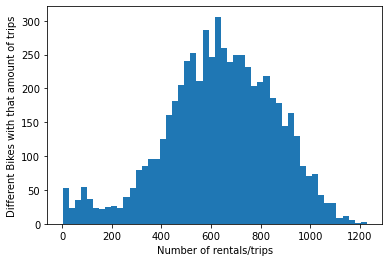

In [115]:
plt.hist(df_bikes['trips_total_with_this_bike'], bins=50)
#plt.set(xlabel='Number of rentals/trips', ylabel='The amount of different bikes')
plt.xlabel('Number of rentals/trips')
plt.ylabel('Different Bikes with that amount of trips')

#### Durschnittlich wurden also jedes Fahrrad etwa 600 mal pro jahr benutzt, manche sogar 1200 mal. manche nur 1 mal.

Text(0, 0.5, 'Different Bikes with this amount')

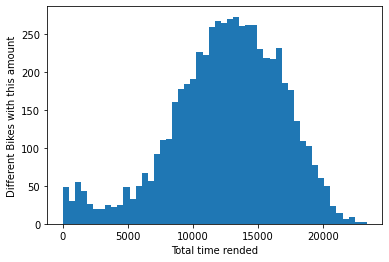

In [116]:
plt.hist(df_bikes['sum_of_all_tripsduration_min'], bins=50)
plt.xlabel('Total time rended')
plt.ylabel('Different Bikes with this amount')

#### Durschnittlich wurden ein Fahrrad etwa 12 Tausend Minuten pro Jahr benutzt, manche sogar über 20 Tausend

In [117]:
#leider fehlen noch ein paar bikestationen
#sind aber kaum welche, also koennen wir glaube ich ignorieren!
df_missingbikegeo=df[df['start_lat'].isnull()==True]
df_missingbikegeo=df_missingbikegeo.loc[~df_missingbikegeo['start_station_id'].duplicated(),:]

In [118]:
df_missend=df[df['end_lat'].isnull()==True]
df_missend=df_missend.loc[~df_missend['end_station_id'].duplicated(),:]
df_missingbikegeo=df_missingbikegeo.append(df_missend,ignore_index=True)


In [119]:
df_stationunknown=pd.DataFrame(columns=['station_id','station_name'])
df_stationunknown['station_id']=df_missingbikegeo['start_station_id']
df_stationunknown['station_name']=df_missingbikegeo['start_station_name']



In [120]:
df_stationunknown2=pd.DataFrame(columns=['station_id','station_name'])
df_stationunknown2['station_id']=df_missingbikegeo['end_station_id']
df_stationunknown2['station_name']=df_missingbikegeo['end_station_name']
df_stationunknown=df_stationunknown.append(df_stationunknown2,ignore_index=True)

In [121]:
#zu folgenden stationen fehlen uns noch die koordinaten:
df_stationunknown=df_stationunknown.loc[~df_stationunknown['station_id'].duplicated(),:]
df_stationunknown

,station_id,station_name
0,565,Ashland Ave & 66th St
1,561,Damen Ave & 59th St
2,360,DIVVY Map Frame B/C Station
3,665,South Chicago Ave & Elliot Ave
4,568,Vincennes Ave & 75th St
5,652,Rhodes Ave & 71st St
6,361,DIVVY CASSETTE REPAIR MOBILE STATION
7,564,Racine Ave & 65th St
8,1,Special Events
9,669,LBS - BBB La Magie
